In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [7]:
import os
os.chdir("C:/Users/Sristi/Documents/R/data")
os.getcwd()

'C:\\Users\\Sristi\\Documents\\R\\data'

In [8]:
import pandas as pd
df_sales=pd.read_csv("sales.csv", sep=",")
df_sales

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [9]:
df_sales.drop(df_sales.columns[0], axis=1)

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [10]:
import numpy as np
df_input=df_sales.drop(columns=["sales"])
df_target=df_sales[["sales"]]

In [11]:
df_input

,Unnamed: 0,TV,radio,newspaper
0,1,230.1,37.8,69.2
1,2,44.5,39.3,45.1
2,3,17.2,45.9,69.3
3,4,151.5,41.3,58.5
4,5,180.8,10.8,58.4
...,...,...,...,...
195,196,38.2,3.7,13.8
196,197,94.2,4.9,8.1
197,198,177.0,9.3,6.4
198,199,283.6,42.0,66.2


In [12]:
df_target

,sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9
...,...
195,7.6
196,9.7
197,12.8
198,25.5


In [13]:
#Check for null values in df_input and df_target
print(df_input.isnull().sum())
#no null values found

Unnamed: 0    0
TV            0
radio         0
newspaper     0
dtype: int64


In [14]:
print(df_target.isnull().sum())
#no null values found

sales    0
dtype: int64


In [15]:
#check correlation matrix
sales_cor = pd.concat([df_input,df_target],axis=1).corr()
sales_cor
#it shows that only one has correlation around 0.5 with target. Others have weak correlation with the target.

,Unnamed: 0,TV,radio,newspaper,sales
Unnamed: 0,1.000000,0.017715,-0.110680,-0.154944,-0.051616
TV,0.017715,1.000000,0.054809,0.056648,0.782224
radio,-0.110680,0.054809,1.000000,0.354104,0.576223
newspaper,-0.154944,0.056648,0.354104,1.000000,0.228299
sales,-0.051616,0.782224,0.576223,0.228299,1.000000


In [16]:
#Statistical description of the dataset
pd.concat([df_input,df_target],axis=1).describe()
#In some cols like newspaper the mean is greater than the median(50%)
#The standard deviation is very high
#in case of newspaper the difference in the max value and 75% percentile is very high.
#output shows presence of outliers in the dataset.

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


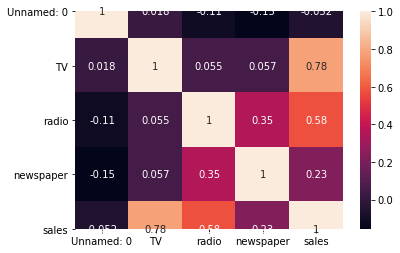

In [17]:
#Visualizations
sns.heatmap(df_sales.corr(),annot=True)
#sales and TV arehighly correlated. others are moderately correlated
#light shades are highly correlated. We donot see any negative correlation between variables.
#Negatively correlated cols can be dropped from dataset.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000083D9D9C748>,
      dtype=object)

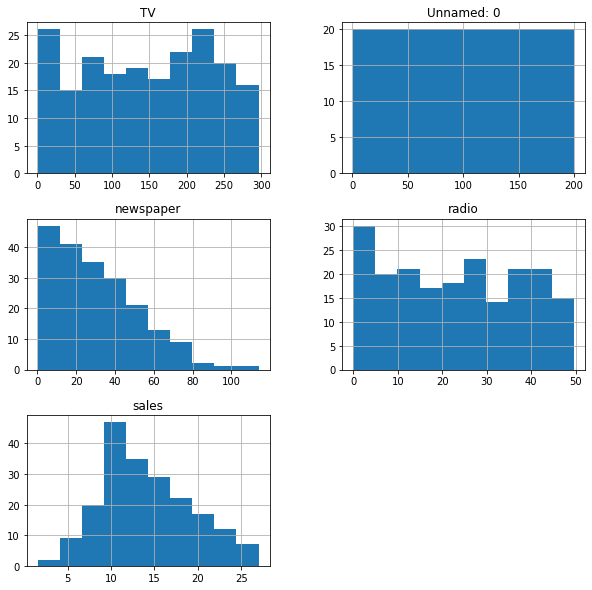

In [18]:
df_sales.hist(figsize=(10,10))

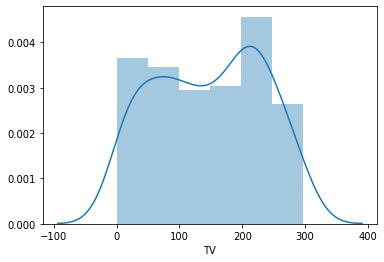

In [19]:
sns.distplot(df_sales["TV"])
#normally distributed

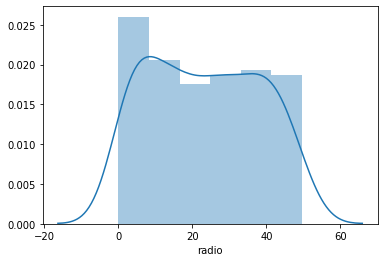

In [20]:
sns.distplot(df_sales["radio"])
#normally distributed

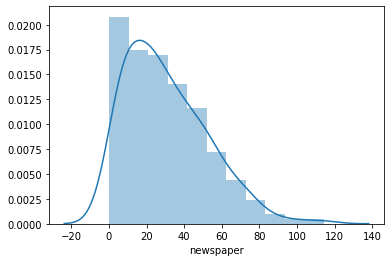

In [21]:
sns.distplot(df_sales["newspaper"])
#right skewed

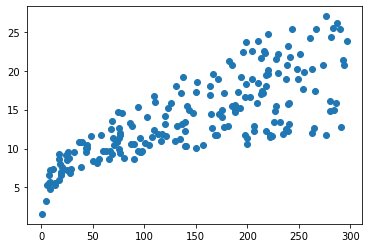

In [22]:
plt.scatter(df_sales["TV"],df_sales["sales"])

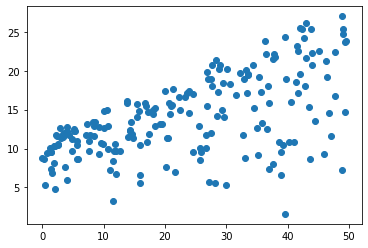

In [23]:
plt.scatter(df_sales["radio"],df_sales["sales"])

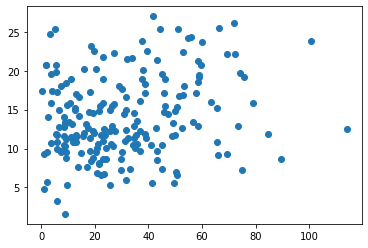

In [24]:
plt.scatter(df_sales["newspaper"],df_sales["sales"])

In [25]:
#data cleaningcan be doneby removing outliers, removing skewed values and negatively correlated values if present.
#checking skewness
df_sales.skew()
#newspaper col is skewed

Unnamed: 0    0.000000
TV           -0.069853
radio         0.094175
newspaper     0.894720
sales         0.407571
dtype: float64

In [26]:
#Treating skewness
import numpy as np
for col in df_sales.columns:
    if df_sales.skew().loc[col]>0.55:
        df_sales[col]=np.sqrt(df_sales[col])

In [27]:
df_sales.skew()

Unnamed: 0    0.000000
TV           -0.069853
radio         0.094175
newspaper     0.062388
sales         0.407571
dtype: float64

In [28]:
df_sales.shape

(200, 5)

In [29]:
#Removing outliers using zscore
from scipy.stats import zscore
df_combined=pd.concat([df_input,df_target],axis=1)
z_scr=zscore(df_combined)
df_combined_new=df_combined.loc[(abs(z_scr)<3).all(axis=1)]
print(df_combined_new.shape)
#below output shows that someoutiers havebeen removed

(198, 5)


In [30]:
#Separating input and output from df_combined_new
df_x=df_combined_new.drop(columns=["sales"])
df_y=df_combined_new[["sales"]]

In [31]:
#calculating max r2 score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
def maxr2_score(regr,df_x,df_y):
    max_r_score=0
    for r_state in range(42,100):
        x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, random_state = r_state,test_size=0.20)
        regr.fit(x_train,y_train)
        y_pred = regr.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        print("r2 score corresponding to ",r_state," is ",r2_scr)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
    print("max r2 score corresponding to ",final_r_state," is ",max_r_score)
    return final_r_state

In [32]:
from sklearn.linear_model import LinearRegression
lreg=LinearRegression()
r_state=maxr2_score(lreg,df_x,df_y)

r2 score corresponding to  42  is  0.8990848341790881
r2 score corresponding to  43  is  0.8752291135526858
r2 score corresponding to  44  is  0.8117058364229195
r2 score corresponding to  45  is  0.866676415479869
r2 score corresponding to  46  is  0.8725065337165865
r2 score corresponding to  47  is  0.8915862004650885
r2 score corresponding to  48  is  0.865969570078631
r2 score corresponding to  49  is  0.834613984013017
r2 score corresponding to  50  is  0.8380732331305449
r2 score corresponding to  51  is  0.8871919698004077
r2 score corresponding to  52  is  0.8924031079273221
r2 score corresponding to  53  is  0.8509064329034484
r2 score corresponding to  54  is  0.877667326663565
r2 score corresponding to  55  is  0.8976992914202157
r2 score corresponding to  56  is  0.8434059925660247
r2 score corresponding to  57  is  0.8636720042126564
r2 score corresponding to  58  is  0.9221333977691208
r2 score corresponding to  59  is  0.9184446809329553
r2 score corresponding to  60  i

In [33]:
#Use GridSearchCV to find value of n_neighbors in KNN model
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
neighbors={"n_neighbors":range(1,30)}
knr=KNeighborsRegressor()
gknr = GridSearchCV(knr, neighbors, cv=5)
gknr.fit(df_x,df_y)
gknr.best_params_

{'n_neighbors': 3}

In [34]:
#Calculating r2 score for KNN model based on n_neighbors value
knr=KNeighborsRegressor(n_neighbors=3)
r_state=maxr2_score(knr,df_x,df_y)

r2 score corresponding to  42  is  0.7892581518254838
r2 score corresponding to  43  is  0.8158261133579647
r2 score corresponding to  44  is  0.7087702803253738
r2 score corresponding to  45  is  0.7197906486116826
r2 score corresponding to  46  is  0.7177762530947105
r2 score corresponding to  47  is  0.7639122904814695
r2 score corresponding to  48  is  0.7610842002328141
r2 score corresponding to  49  is  0.7973244365090041
r2 score corresponding to  50  is  0.515633182432014
r2 score corresponding to  51  is  0.7489668647186684
r2 score corresponding to  52  is  0.8068632990766073
r2 score corresponding to  53  is  0.7991569736580435
r2 score corresponding to  54  is  0.7161926441596081
r2 score corresponding to  55  is  0.8012791560112081
r2 score corresponding to  56  is  0.7416290429834956
r2 score corresponding to  57  is  0.8465235777997029
r2 score corresponding to  58  is  0.6899582665991855
r2 score corresponding to  59  is  0.7134823042795874
r2 score corresponding to  60

In [35]:
#Calculate mean r2 score and std deviation in r2 score for Linear Regresssion
from sklearn.model_selection import cross_val_score
print("Mean r2 score for Linear Regression: ",cross_val_score(lreg,df_x,df_y,cv=5,scoring="r2").mean())
print("standard deviation in r2 score for Linear Regression: ",cross_val_score(lreg,df_x,df_y,cv=5,scoring="r2").std())

Mean r2 score for Linear Regression:  0.8827160786305974
standard deviation in r2 score for Linear Regression:  0.04251730113307698


In [36]:
#Calculate mean r2 score and std deviation in r2 score for KNN Regresssion
from sklearn.model_selection import cross_val_score
print("Mean r2 score for KNN Regression: ",cross_val_score(knr,df_x,df_y,cv=5,scoring="r2").mean())
print("standard deviation in r2 score for KNR Regression: ",cross_val_score(knr,df_x,df_y,cv=5,scoring="r2").std())

Mean r2 score for KNN Regression:  0.7570140030325976
standard deviation in r2 score for KNR Regression:  0.07200562795155102


In [37]:
#On comparing we can say KNN is a better model here

In [38]:
#Check Lasso Regression to find best alpha value
from sklearn.linear_model import Lasso
lsreg=Lasso()
parameters={"alpha":[0.001,0.01,0.1,1]}
clf = GridSearchCV(lsreg, parameters, cv=10)
clf.fit(df_x,df_y)
clf.best_params_

{'alpha': 1}

In [39]:
#max r2 score for Lasso
lsreg=Lasso(alpha=1)
r_state=maxr2_score(lsreg,df_x,df_y)

r2 score corresponding to  42  is  0.8986421597350082
r2 score corresponding to  43  is  0.8776216823373606
r2 score corresponding to  44  is  0.8171325814194227
r2 score corresponding to  45  is  0.870137497734777
r2 score corresponding to  46  is  0.8742202168665467
r2 score corresponding to  47  is  0.8952316826625188
r2 score corresponding to  48  is  0.8703540116150504
r2 score corresponding to  49  is  0.8374074222414056
r2 score corresponding to  50  is  0.8338983978038772
r2 score corresponding to  51  is  0.8926386075865208
r2 score corresponding to  52  is  0.8914691922304233
r2 score corresponding to  53  is  0.8523676173195462
r2 score corresponding to  54  is  0.8773002759771629
r2 score corresponding to  55  is  0.89733663205897
r2 score corresponding to  56  is  0.8456596528879851
r2 score corresponding to  57  is  0.868711948991767
r2 score corresponding to  58  is  0.9215162357049967
r2 score corresponding to  59  is  0.9166279573629553
r2 score corresponding to  60  i

In [40]:
#cross val score for Lasso
print("Mean r2 score for Lasso Regression: ",cross_val_score(lsreg,df_x,df_y,cv=5,scoring="r2").mean())
print("standard deviation in r2 score for Lasso Regression: ",cross_val_score(lsreg,df_x,df_y,cv=5,scoring="r2").std())

Mean r2 score for Lasso Regression:  0.8844838672207616
standard deviation in r2 score for Lasso Regression:  0.039774563661022035


In [41]:
#Use ensemble techniques like Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor
import warnings
warnings.filterwarnings("ignore")
gbr=GradientBoostingRegressor()
parameters={"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[10,100,500,1000]}
clf = GridSearchCV(gbr, parameters, cv=5)
clf.fit(df_x,df_y)
clf.best_params_

{'learning_rate': 0.1, 'n_estimators': 100}

In [42]:
#Using cross val score to check mean r2 and std deviation in gbr
gbr=GradientBoostingRegressor(learning_rate=0.1,n_estimators=100)
print("Mean r2 score for Gradient Boosting Regression: ",cross_val_score(gbr,df_x,df_y,cv=5,scoring="r2").mean())
print("standard deviation in r2 score for Gradient Boosting Regression: ",cross_val_score(gbr,df_x,df_y,cv=5,scoring="r2").std())

Mean r2 score for Gradient Boosting Regression:  0.9781206047420303
standard deviation in r2 score for Gradient Boosting Regression:  0.009156347232723688


In [43]:
#Let's save linear regression with random state corresponding to r2 score 90
x_train, x_test, y_train, y_test = train_test_split(df_x,df_y,random_state = 90, test_size = 0.30)
lreg=LinearRegression()
lreg.fit(x_train,y_train)
y_pred=lreg.predict(x_test)

In [44]:
import numpy as np
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("RMSE is: ",np.sqrt(mean_squared_error(y_test,y_pred)))
print("r2_score is: ",r2_score(y_test,y_pred))

RMSE is:  1.242477341766737
r2_score is:  0.9372921325652438


In [ ]:
!pip install joblib
from sklearn.externals import joblib
joblib.dump(lreg, "Sales_lreg.pkl")